In [104]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.signal import find_peaks

from sre_parse import CATEGORIES



all = pd.DataFrame(pd.read_excel('sensordata_excel/complete_data_left_right_anomalie_data.xlsx'))

all.dropna()
all.shape

data = all[['acc.ax','acc.ay','acc.az','acc.gx','acc.gy','acc.gz','gyro.gx','gyro.gy','gyro.gz','timestamp']]

target = all[['target']]
target_names = all[['target.names']]





In [105]:
accgx_list =[]
accgy_list =[]
accgz_list = []
accax_list = []
accay_list = []
accaz_list = []
gyrogx_list = []
gyrogy_list = []
gyrogz_list = []
train_labels = []
window_size = 18 
step_size = 6

for i in range(0, data.shape[0] - window_size, step_size):
    accax = data['acc.ax'].values[i: i + 18]
    accay = data['acc.ay'].values[i: i + 18]
    accaz = data['acc.az'].values[i: i + 18]
    accgx = data['acc.gx'].values[i: i + 18]
    accgy = data['acc.gy'].values[i: i + 18]
    accgz = data['acc.gz'].values[i: i + 18]
    gyrogx = data['gyro.gz'].values[i: i + 18]
    gyrogy = data['gyro.gz'].values[i: i + 18]
    gyrogz = data['gyro.gz'].values[i: i + 18]
    label = stats.mode(target[i: i + 18])[0][0]


    accax_list.append(accax)
    accay_list.append(accay)
    accaz_list.append(accaz)
    accgx_list.append(accgx)
    accgy_list.append(accgy)
    accgz_list.append(accgz)
    gyrogx_list.append(gyrogx)
    gyrogy_list.append(gyrogy)
    gyrogz_list.append(gyrogz)
    train_labels.append(label)

# neues DataFrame
X_data = pd.DataFrame()

# Mittelwert
X_data['accax_mean'] = pd.Series(accax_list).apply(lambda x: x.mean())
X_data['accay_mean'] = pd.Series(accay_list).apply(lambda x: x.mean())
X_data['accaz_mean'] = pd.Series(accaz_list).apply(lambda x: x.mean())
X_data['accgx_mean'] = pd.Series(accgx_list).apply(lambda x: x.mean())
X_data['accgy_mean'] = pd.Series(accgy_list).apply(lambda x: x.mean())
X_data['accgz_mean'] = pd.Series(accgz_list).apply(lambda x: x.mean())
X_data['gyrogx_mean'] = pd.Series(gyrogx_list).apply(lambda x: x.mean())
X_data['gyrogy_mean'] = pd.Series(gyrogy_list).apply(lambda x: x.mean())
X_data['gyrogz_mean'] = pd.Series(gyrogz_list).apply(lambda x: x.mean())

# Standardabweichung
X_data['accax_std'] = pd.Series(accax_list).apply(lambda x: x.std())
X_data['accay_std'] = pd.Series(accay_list).apply(lambda x: x.std())
X_data['accaz_std'] = pd.Series(accaz_list).apply(lambda x: x.std())
X_data['accgx_std'] = pd.Series(accgx_list).apply(lambda x: x.std())
X_data['accgy_std'] = pd.Series(accgy_list).apply(lambda x: x.std())
X_data['accgz_std'] = pd.Series(accgz_list).apply(lambda x: x.std())
X_data['gyrogx_std'] = pd.Series(gyrogx_list).apply(lambda x: x.std())
X_data['gyrogy_std'] = pd.Series(gyrogy_list).apply(lambda x: x.std())
X_data['gyrogz_std'] = pd.Series(gyrogz_list).apply(lambda x: x.std())

# durchschnittliche absolute Abweichung
X_data['accax_aad'] = pd.Series(accax_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accay_aad'] = pd.Series(accay_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accaz_aad'] = pd.Series(accaz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgx_aad'] = pd.Series(accgx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgy_aad'] = pd.Series(accgy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgz_aad'] = pd.Series(accgz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['gyrogx_aad'] = pd.Series(gyrogx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['gyrogy_aad'] = pd.Series(gyrogy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['gyrogz_aad'] = pd.Series(gyrogz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# Minimalwert
X_data['accax_min'] = pd.Series(accax_list).apply(lambda x: x.min())
X_data['accay_min'] = pd.Series(accay_list).apply(lambda x: x.min())
X_data['accaz_min'] = pd.Series(accaz_list).apply(lambda x: x.min())
X_data['accgx_min'] = pd.Series(accgz_list).apply(lambda x: x.min())
X_data['accgy_min'] = pd.Series(accgz_list).apply(lambda x: x.min())
X_data['accgz_min'] = pd.Series(accgz_list).apply(lambda x: x.min())
X_data['gyrogx_min'] = pd.Series(gyrogx_list).apply(lambda x: x.min())
X_data['gyrogy_min'] = pd.Series(gyrogy_list).apply(lambda x: x.min())
X_data['gyrogz_min'] = pd.Series(gyrogz_list).apply(lambda x: x.min())

# Maximalwert
X_data['accax_max'] = pd.Series(accax_list).apply(lambda x: x.max())
X_data['accay_max'] = pd.Series(accay_list).apply(lambda x: x.max())
X_data['accaz_max'] = pd.Series(accaz_list).apply(lambda x: x.max())
X_data['accgx_max'] = pd.Series(accgx_list).apply(lambda x: x.max())
X_data['accgy_max'] = pd.Series(accgy_list).apply(lambda x: x.max())
X_data['accgz_max'] = pd.Series(accgz_list).apply(lambda x: x.max())
X_data['gyrogx_max'] = pd.Series(gyrogx_list).apply(lambda x: x.max())
X_data['gyrogy_max'] = pd.Series(gyrogy_list).apply(lambda x: x.max())
X_data['gyrogz_max'] = pd.Series(gyrogz_list).apply(lambda x: x.max())


# Median
X_data['accax_median'] = pd.Series(accax_list).apply(lambda x: np.median(x))
X_data['accay_median'] = pd.Series(accay_list).apply(lambda x: np.median(x))
X_data['accaz_median'] = pd.Series(accaz_list).apply(lambda x: np.median(x))
X_data['accgx_median'] = pd.Series(accgx_list).apply(lambda x: np.median(x))
X_data['accgy_median'] = pd.Series(accgy_list).apply(lambda x: np.median(x))
X_data['accgz_median'] = pd.Series(accgz_list).apply(lambda x: np.median(x))
X_data['gyrogx_median'] = pd.Series(gyrogx_list).apply(lambda x: np.median(x))
X_data['gyrogy_median'] = pd.Series(gyrogy_list).apply(lambda x: np.median(x))
X_data['gyrogz_median'] = pd.Series(gyrogz_list).apply(lambda x: np.median(x))

# Median absolute Abweichung
X_data['accax_mad'] = pd.Series(accax_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accay_mad'] = pd.Series(accay_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accaz_mad'] = pd.Series(accaz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgx_mad'] = pd.Series(accgx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgy_mad'] = pd.Series(accgy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgz_mad'] = pd.Series(accgz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['gyrogx_mad'] = pd.Series(gyrogx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['gyrogy_mad'] = pd.Series(gyrogy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['gyrogz_mad'] = pd.Series(gyrogz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# Interquartilbereich
X_data['accax_IQR'] = pd.Series(accax_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accay_IQR'] = pd.Series(accay_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accaz_IQR'] = pd.Series(accaz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgx_IQR'] = pd.Series(accgx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgy_IQR'] = pd.Series(accgy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgz_IQR'] = pd.Series(accgz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['gyrogx_IQR'] = pd.Series(gyrogx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['gyrogy_IQR'] = pd.Series(gyrogy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['gyrogz_IQR'] = pd.Series(gyrogz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))


# Beschleunigung avg
X_data['avg_result_acc'] = [i.mean() for i in ((pd.Series(accax_list)**2 + pd.Series(accay_list)**2 + pd.Series(accaz_list)**2)**0.5)]

In [106]:

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X = X_data
y = train_labels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)

dtc.fit(X_train,y_train)


y_pred = dtc.predict(X_test)

dtc = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])
dtc2 = pd.Series([1.0,1.0,1.0,1.0])
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.89      0.81      0.85        21
           2       0.83      0.91      0.87        22
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        23

    accuracy                           0.94        93
   macro avg       0.95      0.94      0.94        93
weighted avg       0.94      0.94      0.94        93



In [107]:
graph = pd.concat([dtc, dtc2], axis = 1)
graph.columns = ['mit Anomalie', 'ohne Anomalie'] # ,'GradientBoostingClassifier'
graph.rename(index={0:'Precision',1:'Recall', 2:'Accuracy', 3: 'F1'}, inplace=True)


print(graph)

           mit Anomalie  ohne Anomalie
Precision      0.936804            1.0
Recall         0.935484            1.0
Accuracy       0.935484            1.0
F1             0.935273            1.0


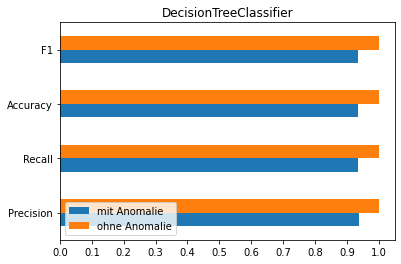

In [108]:
ax = graph.plot.barh(xticks = (np.arange(0, 1.1, step=0.1)), width=0.5, title = 'DecisionTreeClassifier ')
ax.legend(loc='lower left')